In [1]:
using Serialization
using Distributions
using DataFrames
using CSV
using Plots

### Find the alpha that produces the veridical representation (3 clusters) most frequently

In [5]:
# Dictionary to store all results
all_results = Dict()

alpha = 0
filename = "results/find_best_alpha/parameter_space_results_alpha_$(alpha).ser"

if isfile(filename)
    results = deserialize(filename)
    all_results[alpha] = results
    println("Loaded results for alpha = $(alpha)")
else
    println("File not found: $(filename)")
end


# Loop through alpha values (0.1 to 2.0 in steps of 0.1)
for i in 0:19
    alpha = round(0.1 + 0.1*i, sigdigits=2)
    filename = "results/find_best_alpha/parameter_space_results_alpha_$(alpha).ser"
    
    if isfile(filename)
        results = deserialize(filename)
        all_results[alpha] = results
        println("Loaded results for alpha = $(alpha)")
    else
        println("File not found: $(filename)")
    end
end
#

Loaded results for alpha = 0
Loaded results for alpha = 0.1
Loaded results for alpha = 0.2
Loaded results for alpha = 0.3
Loaded results for alpha = 0.4
Loaded results for alpha = 0.5
Loaded results for alpha = 0.6
Loaded results for alpha = 0.7
Loaded results for alpha = 0.8
Loaded results for alpha = 0.9
Loaded results for alpha = 1.0
Loaded results for alpha = 1.1
Loaded results for alpha = 1.2
Loaded results for alpha = 1.3
Loaded results for alpha = 1.4
Loaded results for alpha = 1.5
Loaded results for alpha = 1.6
Loaded results for alpha = 1.7
Loaded results for alpha = 1.8
Loaded results for alpha = 1.9
Loaded results for alpha = 2.0


In [6]:
max_clus_values = [r.max_clus for r in all_results[0.2]]
mean(max_clus_values)

3.078

### Compare total amount of rewards for alpha = 0 and alpha = 0.2

In [7]:
function analyze_results(all_results)
    # Initialize empty DataFrame with desired columns
    df = DataFrame(
        alpha = Float64[],
        mode_clus = Int64[],
        prop_1 = Float64[],
        prop_2 = Float64[],
        prop_3 = Float64[],
        prop_4 = Float64[],
        avg_total_reward = Float64[]
    )

    # Process each alpha value
    for (alpha, results) in all_results
        # Extract max_clus values for this alpha
        max_clus_values = [r.max_clus for r in results]
        
        # Calculate mode of max_clus
        mode_clus = mode(max_clus_values)
        
        # Calculate proportions for each cluster number
        n_samples = length(max_clus_values)
        prop_1 = sum(max_clus_values .== 1) / n_samples
        prop_2 = sum(max_clus_values .== 2) / n_samples
        prop_3 = sum(max_clus_values .== 3) / n_samples
        prop_4 = sum(max_clus_values .== 4) / n_samples


        # Calculate average total reward
        total_rewards = [r.total_reward for r in results]
        avg_reward = mean(total_rewards)
        
        # Add row to DataFrame
        push!(df, (
            alpha,
            mode_clus,
            prop_1,
            prop_2, 
            prop_3,
            prop_4,
            avg_reward
        ))
    end
    
    # Sort by alpha value
    sort!(df, :alpha)
    
    return df
end

# Create summary DataFrame
summary_df = analyze_results(all_results)

,alpha,mode_clus,prop_1,prop_2,prop_3,prop_4,avg_total_reward
,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,0.0,1,1.0,0.0,0.0,0.0,8831.59
2,0.1,3,0.088,0.259,0.484,0.141,8806.52
3,0.2,3,0.049,0.17,0.495,0.23,8733.32
4,0.3,3,0.016,0.119,0.467,0.277,8740.98
5,0.4,3,0.01,0.088,0.425,0.308,8773.73
6,0.5,3,0.013,0.066,0.401,0.291,8759.21
7,0.6,4,0.006,0.042,0.304,0.307,8832.57
8,0.7,3,0.001,0.058,0.343,0.231,8739.27
9,0.8,3,0.007,0.049,0.28,0.236,8791.27


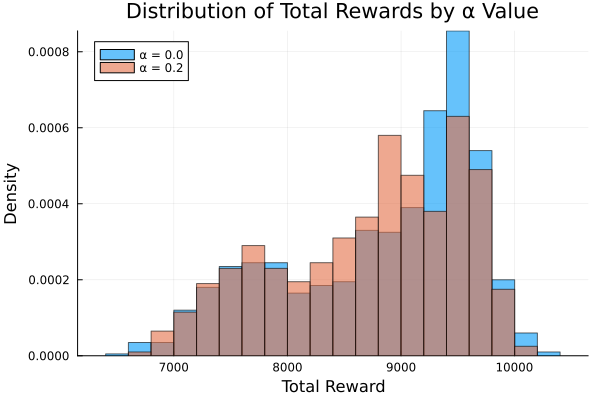

In [8]:
reward_alpha_0 = [r.total_reward for r in all_results[0]]
reward_alpha_02 = [r.total_reward for r in all_results[0.2]]

# Create histogram of rewards for both alpha values
histogram(reward_alpha_0, 
    label="α = 0.0",
    alpha=0.6,
    normalize=true,
    bins=30)
histogram!(reward_alpha_02,
    label="α = 0.2", 
    alpha=0.6,
    normalize=true,
    bins=30)

xlabel!("Total Reward")
ylabel!("Density")
title!("Distribution of Total Rewards by α Value")

In [10]:
function compute_percent_difference(list_a, list_b)
    mean_a = mean(list_a)
    mean_b = mean(list_b)
    percent_diff = (mean_a - mean_b) / mean_b * 100
    return abs(percent_diff), mean_a, mean_b
end

# Calculate percent difference between alpha 0.0 and 0.2 rewards
percent_diff, mean_0, mean_02 = compute_percent_difference(reward_alpha_0, reward_alpha_02)
println(mean_0)
println(mean_02)
println(percent_diff)


8831.59
8733.322
1.1252075670632553
